<p><b><font size = 5 face = 'verdana'>REGRESSÃO LOGÍSTICA NA ELEIÇÃO</font></b></p>
<p><img src = "https://ichef.bbci.co.uk/news/976/cpsprodpb/177A6/production/_113666169_usvoter.jpg"></p>

<p><font size = 4 face = 'verdana'>Modelos de regressão não linear são usados, em geral, em duas situações: casos em que as variáveis respostas são qualitativas e os erros não são normalmente distribuídos.
O modelo de regressão não linear logístico binário é utilizado quando a variável resposta é qualitativa com dois resultados possíveis, por exemplo, sobrepeso de crianças (tem sobrepeso ou não tem sobrepeso).
Esse modelo pode ser estendido quando a variável resposta qualitativa tem mais do que duas categorias, por exemplo, a pressão sanguínea pode ser classificada como alta, normal e baixa. </font></p>


<p><font size = 4 face = 'verdana'>Prevendo se o candidato será eleito ou não a partir do histórico de gastos de candidatos eleitos e não. Em uma base temos candidatos eleitos e não e suas despesas/investimento feito na campanha.
Analisando essa base pode-se criar um modelo que irá indicar a probabilidade de um novo candidato ser eleito ou não de acordo com o valor investido na campanha. </font></p>



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

In [60]:
# Leitura do dataset eleicao.csv
# Base eleiçãoAnterior (SITUACAO: 0 — Não eleito 1 — Eleito)
df = pd.read_csv('Eleicao.csv', sep=';')
df.head(10)

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


In [38]:
# Verificando o total de linhas e colunas
df.shape

(47, 3)

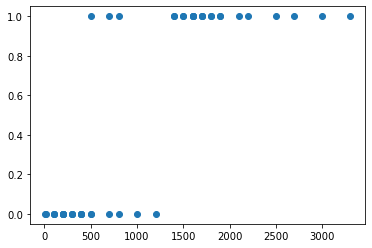

In [39]:
# Plotando o gráfico gerado a partir da Situação (variável dependente) em função da Despesa (variável independente):
plt.scatter(df.DESPESAS, df.SITUACAO)

In [63]:
# Analisando algumas características da base com describe:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SITUACAO,47.0,0.510638,0.505291,0.0,0.0,1.0,1.0,1.0
DESPESAS,47.0,1085.744681,870.968338,10.0,300.0,800.0,1700.0,3300.0


In [64]:
# Verificando se existe correlação entre Situação e Despesas
# Acima de 0.7 é considerada alta correlação entre os fatores.
df.corr()

,SITUACAO,DESPESAS
SITUACAO,1.000000,0.812187
DESPESAS,0.812187,1.000000


In [41]:
# X -> atributos 
x  = df.iloc[:, 2].values
y  = df.iloc[:, 1].values
x.shape

(47,)

In [42]:
# Transformar em matriz
x  = x[:, np.newaxis]
x.shape
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

In [45]:
# Criação do modelo de regressão Logistica
modelo =  LogisticRegression()
modelo.fit(x, y)

LogisticRegression()

In [47]:
# Parâmetros
modelo.intercept_
modelo.coef_

array([[0.00498364]])

In [49]:
# valores que serão previstos
# intervalo de valores entre 10 e 3000 -> despesas
x_teste = np.linspace(10, 3000)
len(x_teste)

50

In [51]:
# Função -> calculo da sigmoid
# logistica sigmoid

def model(x):
    return 1 / (1 + np.exp(-x))

x_teste

array([  10.        ,   71.02040816,  132.04081633,  193.06122449,
        254.08163265,  315.10204082,  376.12244898,  437.14285714,
        498.16326531,  559.18367347,  620.20408163,  681.2244898 ,
        742.24489796,  803.26530612,  864.28571429,  925.30612245,
        986.32653061, 1047.34693878, 1108.36734694, 1169.3877551 ,
       1230.40816327, 1291.42857143, 1352.44897959, 1413.46938776,
       1474.48979592, 1535.51020408, 1596.53061224, 1657.55102041,
       1718.57142857, 1779.59183673, 1840.6122449 , 1901.63265306,
       1962.65306122, 2023.67346939, 2084.69387755, 2145.71428571,
       2206.73469388, 2267.75510204, 2328.7755102 , 2389.79591837,
       2450.81632653, 2511.83673469, 2572.85714286, 2633.87755102,
       2694.89795918, 2755.91836735, 2816.93877551, 2877.95918367,
       2938.97959184, 3000.        ])

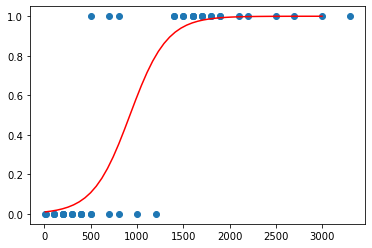

In [53]:
# ravel -> numpy arrray em para vetor
# os valores previstos pelo intervalo do linspace de 10 a 3000
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()


plt.scatter(x, y)
plt.plot(x_teste, r, c='red')

In [55]:
# Utilizar o arquivo dos novos candidatos para efetuar
# uma nova previsão

base_previsoes =pd.read_csv('NovosCandidatos.csv', sep=';')
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas[:, np.newaxis]
despesas.shape

(7, 1)

In [57]:
# Nova Base de dados - Numa nova base de dados, com novos candidatos numa eleição, 
# avaliar a probabilidade dos mesmos serem eleitos em função dos valores investidos.
previsoes_teste = modelo.predict(despesas)
previsoes_teste
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [58]:
# Resultado final: # Podemos perceber que os candidatos que possuem 
# gasto a partir de 1500 a situação dele é favorável para ser eleito
base_previsoes['SITUACAO'] = previsoes_teste
base_previsoes

,CANDIDATO,DESPESAS,SITUACAO
0,A,0,0
1,B,10,0
2,C,200,0
3,D,500,0
4,E,900,0
5,F,1500,1
6,G,3000,1
